In [3]:
import os, shutil

original_dataset_dir = '/content/drive/MyDrive/Data Sets'
base_dir = '/content/drive/MyDrive/Data Sets/Lungs_dataset/data'
os.mkdir(base_dir)

In [4]:
# Making Training and testing folders in data folder
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [1]:
print("Hello")

Hello


In [5]:
# Making positive and negative folders in both train and test folders
train_positive_dir = os.path.join(train_dir, 'positive')
os.mkdir(train_positive_dir)

train_negative_dir = os.path.join(train_dir, 'negative')
os.mkdir(train_negative_dir)

test_positive_dir = os.path.join(test_dir, 'positive')
os.mkdir(test_positive_dir)

test_negative_dir = os.path.join(test_dir, 'negative')
os.mkdir(test_negative_dir)

In [7]:
# Renaming the picture name through loop so that we can easily access them

# Renaming the positive picture names
pos_path = os.chdir('/content/drive/MyDrive/Data Sets/Lungs_dataset/positive')
i = 1
for filename in os.listdir(pos_path):
    new_name = f'positive{i}.jpeg'
    os.rename(filename, new_name)
    i+=1

# Renaming the negative picture names
neg_path = os.chdir('/content/drive/MyDrive/Data Sets/Lungs_dataset/nagative')
i = 1
for filename in os.listdir(neg_path):
    new_name = f'negative{i}.jpeg'
    os.rename(filename, new_name)
    i+=1

In [9]:
# Copying the first 176 pictures(75%) from postive folders and taking them to postive folder in training one.
fnames = [f'positive{i}.jpeg' for i in range(1,176)]
for fname in fnames:
    src = os.path.join('/content/drive/MyDrive/Data Sets/Lungs_dataset/positive', fname)
    dst = os.path.join(train_positive_dir, fname)
    shutil.copyfile(src, dst)



In [11]:
# Copying the first 125 pictures(75%) from negative folders and taking them to negative folder in training one.
fnames = [f'negative{i}.jpeg' for i in range(1,226)]
for fname in fnames:
    src = os.path.join('/content/drive/MyDrive/Data Sets/Lungs_dataset/nagative', fname)
    dst = os.path.join(train_negative_dir, fname)
    shutil.copyfile(src, dst)

In [13]:
# Copying the last 59 pictures(25%) from positive folder and taking them to positive folder in testing one.
fnames = [f'positive{i}.jpeg' for i in range(176,235)]
for fname in fnames:
    src = os.path.join('/content/drive/MyDrive/Data Sets/Lungs_dataset/positive', fname)
    dst = os.path.join(test_positive_dir, fname)
    shutil.copyfile(src, dst)

# Copying the last 75 negative (25%) from negative folder and taking them to negative folder in testing one.
fnames = [f'negative{i}.jpeg' for i in range(226,301)]
for fname in fnames:
    src = os.path.join('/content/drive/MyDrive/Data Sets/Lungs_dataset/nagative', fname)
    dst = os.path.join(test_negative_dir, fname)
    shutil.copyfile(src, dst)

In [14]:
# Creating the model architecture
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
# Model compilation
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [16]:
# Rescaling
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 400 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [18]:
history = model.fit_generator(train_generator, epochs=7,)

<ipython-input-18-838dab8262bc>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=7,)


Epoch 1/7
20/20 [==============================] - 31s 1s/step - loss: 0.6917 - acc: 0.5475
Epoch 2/7
20/20 [==============================] - 29s 1s/step - loss: 0.6394 - acc: 0.6650
Epoch 3/7
20/20 [==============================] - 26s 1s/step - loss: 0.5354 - acc: 0.7550
Epoch 4/7
20/20 [==============================] - 26s 1s/step - loss: 0.4470 - acc: 0.8000
Epoch 5/7
20/20 [==============================] - 28s 1s/step - loss: 0.4004 - acc: 0.8350
Epoch 6/7
20/20 [==============================] - 28s 1s/step - loss: 0.3481 - acc: 0.8600
Epoch 7/7
20/20 [==============================] - 32s 2s/step - loss: 0.3195 - acc: 0.8725


In [39]:
# Test data prediction
y_pred = model.predict_generator(test_generator)

<ipython-input-39-4b256800cb2d>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_generator)


In [42]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [25]:
# Confusion matrix and classificatino report
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
cf = confusion_matrix(test_generator.classes, y_pred)

<Axes: >

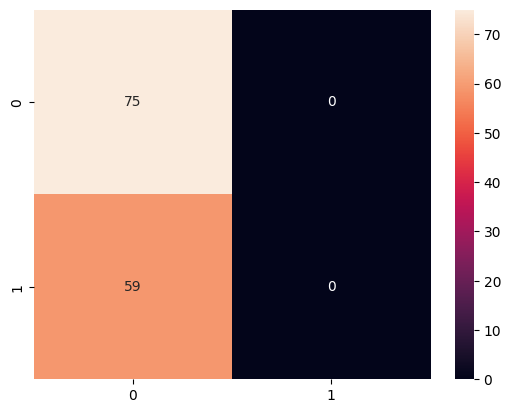

In [44]:
import seaborn as sns
sns.heatmap(cf, fmt ='g', annot= True)

In [46]:
CR = classification_report(test_generator.classes, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
print(CR)

              precision    recall  f1-score   support

           0       0.56      1.00      0.72        75
           1       0.00      0.00      0.00        59

    accuracy                           0.56       134
   macro avg       0.28      0.50      0.36       134
weighted avg       0.31      0.56      0.40       134

